<a href="https://colab.research.google.com/github/1991Ab/Capstone-project-2-Taxi-trip-time-Prediction/blob/main/Taxi_trip_time_Prediction_individual_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
a= input()
b= input()
print(a)
print(b)

# **Project Name**    -  NYC Taxi Trip Time Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Problem Statement**


**BUSINESS PROBLEM OVERVIEW**


Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
!pip install pymysql
import pymysql
from sqlalchemy import create_engine
from sqlalchemy.pool import NullPool

import numpy as np
import seaborn as sns
from scipy.stats import *
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from sklearn.tree import export_graphviz

!pip install shap==0.40.0
import shap 
import graphviz
sns.set_style('darkgrid') 

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
# Mounting the Google Drive
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
# Importing the dataset
file_path = "/content/drive/MyDrive/Capstone project-2/NYC Taxi Data (1).csv"
df = pd.read_csv(file_path)


### Dataset First View

In [ ]:
# Dataset First 
df.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns 
df.shape

We can see that the NYC taxi trip time prediction data set contains 1458644 rows and 11 columns

### Dataset Information

In [ ]:
# Dataset Info
df.info()

Here we see the details of each column present in the dataset such as  their data type and count of values 

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

It is very essential to check if our data set has any duplicate values and remove them if any.We can find out the duplicate values using the function dataset.duplicated().  len(dataset[dataset.duplicated()]) gives the count of duplicate values.From the above code we can see that there are no duplicate values in the dataset.

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(df.isnull().sum())

In [ ]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=True)

It is very important to check for missing values or NAN values as it has a very high impact on the model.Hence identifying the NAN values and treating them becomes very important.From the above data and graph we can see that the dataset has no missing or NAN values.

### What did you know about your dataset?

The dataset given is based on the  NYC Yellow Cab trip record data.We have to predict the taxi trip duration of various rides using various Machine Learning models.The data set has 'trip_duration' as a continous target variable and many independent variables like 'passenger_count' , 'pickup_datetime' , 'dropoff_datetime' etc.The  dataset has 1458644 rows and 11 columns.It has no NAN values and duplicate values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

In [ ]:
# Dataset Describe
df.describe(include='all')

### Variables Description 

The following are the variables used in dataset

* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")
#df.nunique()

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Create a copy of the current dataset and assigning to df
new_df=df.copy()
# Checking Shape of True Value
new_df.shape


In [ ]:
#calculating the distance between pickup and dropoff locations using haversine formula

In [ ]:
!pip  install haversine
from numpy import math
from haversine import haversine
def trip_distance(df) :
  trip_pickup=(df['pickup_latitude'], df['pickup_longitude'])
  trip_dropoff=(df['dropoff_latitude'], df['dropoff_longitude'])
  return haversine(trip_pickup , trip_dropoff)

In [ ]:
#calculating the distance and creating a new column "distance" in the dataset
df['distance']=df.apply(lambda x:trip_distance(x) , axis=1)

In [ ]:
df['distance'].reset_index


In [ ]:
df

Calculating the customer with highest trip distance


In [ ]:
max_distance=df.groupby('id')['distance'].max().reset_index().sort_values(by='distance' , ascending=False)

In [ ]:
max_distance

In [ ]:
#Graphical Representation
sns.set_style('whitegrid')
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (14,5)
sns.barplot(x='id' , y='distance' ,  data=max_distance.head(10))

We can see from the above plot that customer id'id2306955' has the highest distance for trip 

In [ ]:
df.dtypes

In [ ]:
#Changing the data type of variables 'pickup_datetime' and 'dropoff_datetime' to datetime
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [ ]:
df["year"] = df["pickup_datetime"].apply(lambda x: x.year)
df["pickup_month"] = df["pickup_datetime"].apply(lambda x: x.month)
df["dropoff_month"] = df["dropoff_datetime"].apply(lambda x: x.month)
df["pickup_day"] = df["pickup_datetime"].apply(lambda x: x.weekday())
df["dropoff_day"] = df["dropoff_datetime"].apply(lambda x: x.weekday())
df["dropoff_time_hour"] = df["dropoff_datetime"].apply(lambda x: x.hour)
df["dropoff_time_min"] = df["dropoff_datetime"].apply(lambda x: x.minute)
df["pick_up_time_hour"] = df["pickup_datetime"].apply(lambda x: x.hour)
df["pick_up_time_min"] = df["pickup_datetime"].apply(lambda x: x.minute)
df.head(3)

## Number of pickups done on each day of the week

In [ ]:
figure, ax = plt.subplots(nrows=2, ncols = 1, figsize = (10,10))
sns.countplot(x = 'pickup_day', data = df, ax = ax[0])
ax[0].set_title('no of pickups done on each day of the week')

sns.countplot(x = 'dropoff_day', data = df, ax=ax[1])
ax[1].set_title('no of dropoffs done on each day of the week')

plt.tight_layout()

In the above plot day-'0' represents 'Monday' and is considerd as the beginning of the week. day-'6' represents Sunday,the end of the week.From the above plot we can see that the number of pickups and dropoffs are maximum for 'Friday' which is represented as day-'4'. 

## Now,let us analyse the trip duration for a  week

duration=df.groupby("pickup_day")['trip_duration'].mean().sort_values(by='trip_duration' , ascending=False)
duration

In [ ]:
duration=df.groupby("pickup_day")['trip_duration'].mean().reset_index().sort_values(by='trip_duration' , ascending=False)
duration

In [ ]:
#Graphical Representation
sns.pointplot(x='pickup_day' , y='trip_duration' , data=duration)
plt.ylabel('Trip Duration')
plt.xlabel('Weekday')
plt.title('Trip Duration per WeekDay')
plt.show()

From the above plot we can infer that the duration of trip is maximum on Thursday represented as day-'3'.

Now let us see the customer who have highest trip duration 

In [ ]:
customer_distance=df.groupby("id")["trip_duration"].mean().reset_index().sort_values(by="trip_duration" , ascending=False)
customer_distance



Now we will find out the number of customers who travel within 30 mins,customers who travel between 30 mins to 1hr and customers who travel from 1hr to 2hr and customers who travel above 2hrs and more.

In [ ]:
#Dividing the dataset on the basis of cutomer travelling time.
#Determining the count of customers who travel within 30 mins
df_travel_time_30=df[df["trip_duration"]<=1800]
df_travel_time_30.head()


In [ ]:
print(len(df_travel_time_30))

We can see from the above data that the count of customer travelling within 30 mins is really very large which is around 1345526

In [ ]:
#Determinig the count of customers who travel from 30 mins to 1hour.
df_travel_time_60=df[(df["trip_duration"]<=3600)& (df["trip_duration"]>1800)]
df_travel_time_60.head()

In [ ]:
print(len(df_travel_time_60))

From the above analysis we can see that the number of customers who travel between 30 mins to 1 hour is 100801.It is pretty less compared to number of customer who travel within 30 mins. 

In [ ]:
#Determiming the count of customers who travel between 1 hours to 2 hours.
df_travel_time_2hr=df[(df["trip_duration"]>3600) & (df["trip_duration"]<=(3600*2))]
df_travel_time_2hr.head()

In [ ]:
print(len(df_travel_time_2hr))

We can see that the number of customers who travel between 1 hour to 2hour is 10064.

In [ ]:
#Determiming the count of customers who travel for more than 2 hours.
df_travel_time=df[df["trip_duration"]>(3600*2)]
df_travel_time.head()

In [ ]:
print(len(df_travel_time))

From the above analysis we can see that the number of customers having travel time of above 2 hours is 2253 which is pretty less compared to the number of customers travelling within 30 mins.

According to a perception we will get a clear view of customers and their tavel 
duration by graphical representaions.However for analysing the customers trip duration it is necessary to deep dive into the data set to unearth many insights.So I have created a new column called "Distance" using the haversine formula.I have analysed the customers with highest  distance and highest trip_duration.
I have broken down the "pickup_datetime" column,"droppoff_datetime" column into 8 columns which are:-
"pickup_month" , "pick_up_time_hr" , "pick_up_time_min" , "pick_up_day",
"dropoff_month" , "dropoff_time_hr" , "dropoff_time_min" , "dropoff_day"
Following are the insights that were analysed:

*   The maximum cabs were booked on "Friday" represented as day-4

*   The highest duration of trip was on "Thursday" reprsented as day-3

*   The highest duration was done by cutomers whose booking id was 'id0053347'.
    It is found out that the trip duration for this trip is 979.52 hours.

*   The highest distance was travelled by the customers whose booking id is
    found to be 'id2306955'.The distance travelled is approximately  1240.91

*   We can see from the  data analysis that the count of customer      
    travelling within 30 mins is really very large which is around '1345526'   

*   From the above analysis it is inferred that the number of customers who 
    travelbetween 30 mins to 1 hour is 100801.It is pretty less compared to   
    number of customer who travel within 30 mins.

*   We can see that the number of customers who travel between 1 hour to 2hour 
    is 10064.It has become less when compared to the number of customer 
    travelling within 30 mins and number of customer travelling between 30 mins
    to 1 hour

*   From the above analysis we can see that the number of customers having  
    travel time of above 2 hours is 2253 which is very less compared to the  
    number of customers travelling within 2hrs.















## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Horizontal Bar plot on Dependant Variable i.e., Trip Duration (Univariate)

In [ ]:
# Chart - 1 visualization code
sns.set_style('white')
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (14,5)

In [ ]:
df.trip_duration.groupby(pd.cut(df.trip_duration, np.arange(0,9000,600))).count().plot(kind='barh')
plt.xlabel('Trip Counts')
plt.ylabel('Trip Duration in seconds ')
plt.show()

##### 1. Why did you pick the specific chart?

A bar graph is used to compare data among categories.It also shows the  counts of values for the different levels of a categorical or nominal variable.To visualize the number of trip counts for various set of trip durations,I used bar chart.

##### 2. What is/are the insight(s) found from the chart?

From the above plot I got to know that the amount of customers who travel between 0-600 seconds is very large.A lot of people prefer to do short trips in taxi cab wherein the duration is within 10mins.Very few people are booking cabs for longer trips.The number of trips is decresing with the increase in trip duration.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As a taxi cab owner It will be important to analyse the trips that are being booked.Wheather they are  longer trips where the trip duration is more tha an a hour or shorter trips where in the trip ends within 10 mins.This analysis can help to decide the fare of each trip and where to concentrate more number of cabs.

#### Chart - 2 - Countplot for Vendor_Id(Univariate)

In [ ]:
# Chart - 2 visualization code
sns.set_style('white')
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (5,5)
sns.countplot(df["vendor_id"], palette="husl").set_title("Market Share Of Vendor Id")

##### 1. Why did you pick the specific chart?

Countplot Shows the counts of observations in each categorical bin using bars.I used count plot to visualise the categorical feature 'vendor_id' to analyse which vendor has more market share

##### 2. What is/are the insight(s) found from the chart?

From the above plot I got to know that there are two vendors who are providing cab services which are 'Vendor_id1' and 'Vendor_id2'.From the countplot it is evident that  'Vendor_id2' has more number of customers than Vendor_id1'



```
`[# This is formatted as code](https:// [link text](https://))`
```

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes,as a cab owner it becomes important to analyse which all are vendors who are making a high profit and are more popular among the pepole.It will also be crucial to get to know the factors that are leading to more popularity among the people which inturn leads to a high market share  

#### Chart - 3 - Pie chart on "Store_Forward" flag(Univariate)

In [ ]:
# Chart - 3 visualization code
df["store_and_fwd_flag"].value_counts().plot(kind="pie" , labels=['Yes' , 'No'] , autopct="%1.1f%%" , shadow=True , colors=['skyblue' , 'red'] , explode=[0,0])

##### 1. Why did you pick the specific chart?

A pie chart expresses a part-to-whole relationship in your data.Each slice represents one component and all slices added together equal the whole.It becomes easy to visualize data with pie charts and each slice can be analysed easily.I used pie chart to anlyse "store_and_forward"  flag.


##### 2. What is/are the insight(s) found from the chart?

From the above pie chart I came to know that around 99.4% of cabs record the trip record data before sending it to the vendor.Only around 0.6% of cabs have not recorded the cab data before sending it to the vendor.The trip might not hav been recorded due to either poor infrastructure provided by the vendors or due to signal loss that might have happend during  recording of the trip.However analysis shows that all most all cabs prefer to store the recoeded trip.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The above analysis indicates how many of the cabs stotre the trip record before sending it to the vendor.Definetly its helps in creating a positive impact on business.For the taxi companies the trip record data is a very important and crucial data which has to be stored carefully.Storing these types of data help companies to understand the customer needs and can provide better customer satisfaction.Storing the trip record data in vehicle memomry before sending to the vendor means we are duplicating the data.If some mishap happens in the vendor's server end the data will not be destroyed.It can be easily retrived by the vehicle's memory.It sets as an example for good infrastructure and technology provided.Also It helps in providing good customer satisfaction.

#### Chart - 4 - Taxi pick up time vs Passenger count(Bivariate)

> 



In [ ]:
passenger_number=df.groupby("pick_up_time_hour")["passenger_count"].count().reset_index().sort_values(by="passenger_count" , ascending=False)
passenger_number

In [ ]:
sns.set_style('white')
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (8,8)
sns.lineplot(data=passenger_number, x="pick_up_time_hour", y="passenger_count")


##### 1. Why did you pick the specific chart?

A line chart is used to visualize the change in one variable with the change in time or any other continous variable.I used Line plot to track and visualize the change in the number of passengers onbaording cabs with time.

##### 2. What is/are the insight(s) found from the chart?

From the above chart I came to know that the number of people travelling is maximum at 6:00 PM in the evening.From early morning 1:00 AM till 5 AM the number of people travelling is very minimal.The number of people travelling increases linearly from 5 AM untill 10 AM.After 10 AM till 3 PM there is a very few increase in the number of passengers.It dips at 4.00PM however reaches its peak at 6.00 pm.After 6.00 PM in the evening the number of passengers travelling decreases significantly.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes,definetly the above analysis will have a positive impact on the business.
As a company running taxi cabs , it becomes very important to analyse at what time most of the people travel so that they can pool in maximum number of cabs at that particular time.At peak hours which from analysis we got to know as 6 PM in the evening and morning 8-10AM the company can come out with some attractive offers and prices to attract maximum number of customers.Also they can come up with car-pooling option to obtain more number of bookings at a given point of time.

#### Chart - 5 - Taxi Trip duration vs Distance(Bivariate)

In [ ]:
# Chart - 5 visualization code
# Visualizing Percentage of customers taken international plan
sns.set_style('white')
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (8,8)
plt.xlim(0,100000)
plt.ylim(0,600)
sns.scatterplot(x="trip_duration", y="distance", data=df)

##### 1. Why did you pick the specific chart?

A scatter plot uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables in a data set.
I used scatter plot to check how the 'distance' variable is related to the 'trip_duration' variable.

##### 2. What is/are the insight(s) found from the chart?

From the above plot I came to know that 'distance' column and 'trip_duration' are not linearly realted.There were lot of trips whose distance was very minimal nearing to '0' but the time taken to cover them was ranging from 20,000 to 80,000 seconds.Also we can see that in few of the trips very large distance like 600kms were covered in very short period of time which is very unlikley.There are many trips with distance as '0' but have clocked time.This is very unlikely to happen and can be removed. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the analysis found will definetly have a positive impact on the business.
As a cab owner it will be very important to analyse these data of the trip such as what is time taken to cover a particular  distance .It helps to analyse if there is any delay in reaching the destination and the reasons behind it.The reasons can be traffic,bad roads ,bad wheather or even bad driving.

#### Chart - 6 -Month of booking vs number of booking.(Bivariate)

In [ ]:
# Chart - 6  visualization code
# vizualizing code for the months having more number of bookings.
sns.set_style('white')
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (8,8)
group1=df.groupby("pickup_month")["id"].count().reset_index().sort_values(by="id" , ascending=False).rename(columns={'id':'Number of Bookings'})
group1

In [ ]:
sns.pointplot(x="pickup_month" , y="Number of Bookings" , data=group1 , color="indigo").set(title="Number of bookings for each month")

##### 1. Why did you pick the specific chart?

Points plots are very usefull in focusing  and explaining on the different levels of comparison of two variables.I used point plot to analyse how the bookings are done during various months of a year. 

##### 2. What is/are the insight(s) found from the chart?

From the above plot I could visualize that the maximum number of cab bookings were done in the months of 'March' , 'April' and May.
Comparitively less bookings are done in the months of 'January' and 'June'.This can be due to weather conditions.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes,this analysis will definetly have a positive impact on the business.
The taxi owners and vendors can use this data to come up with more number vehicles during these periods.Also during the months where cab bookings are less the companies can come up with attractive fares and special offers to improve their business.

#### Chart - 7- Determining the relationship between 'Trip_duration' and other variables.

In [ ]:
# Chart - 7 visualization code
col=df.describe().columns
col

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration', 'distance',
       'year', 'pickup_month', 'dropoff_month', 'pickup_day', 'dropoff_day',
       'dropoff_time_hour', 'dropoff_time_min', 'pick_up_time_hour',
       'pick_up_time_min'],
      dtype='object')

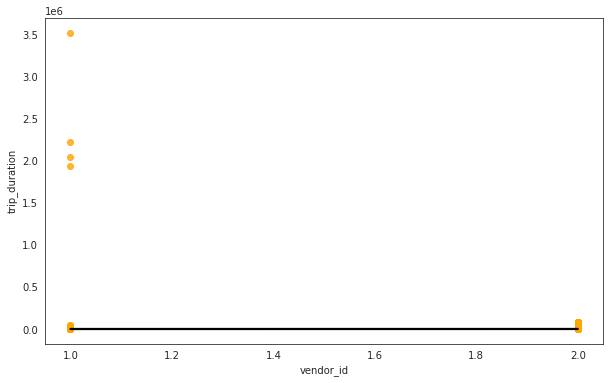

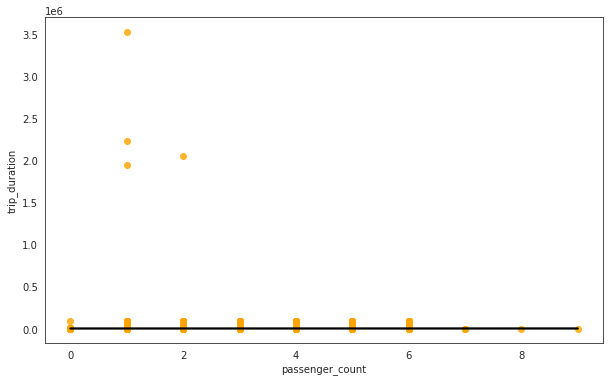

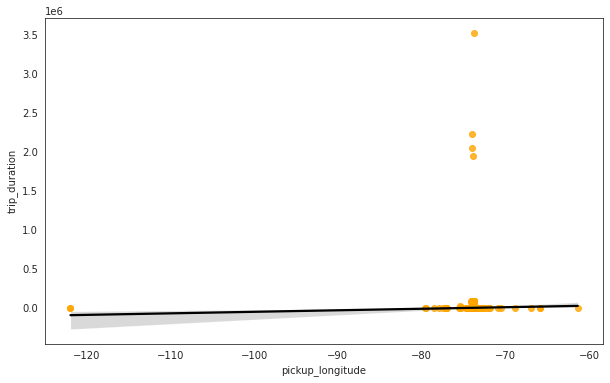

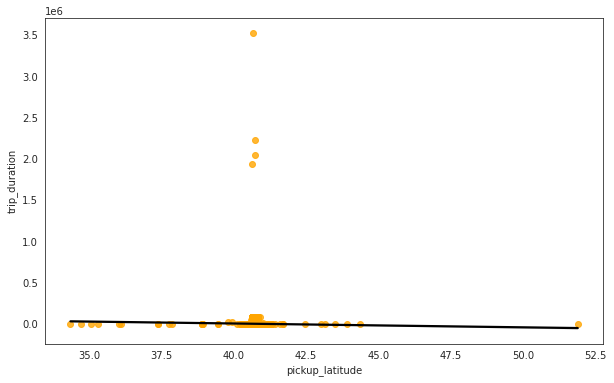

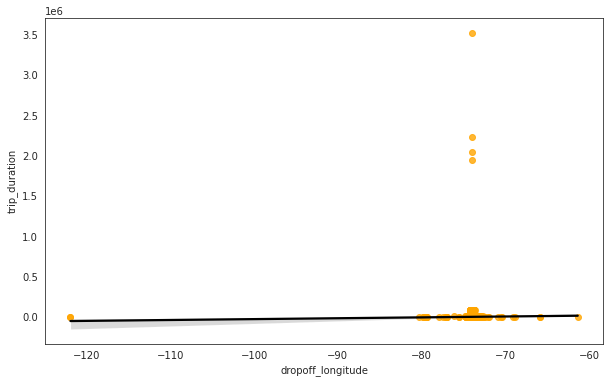

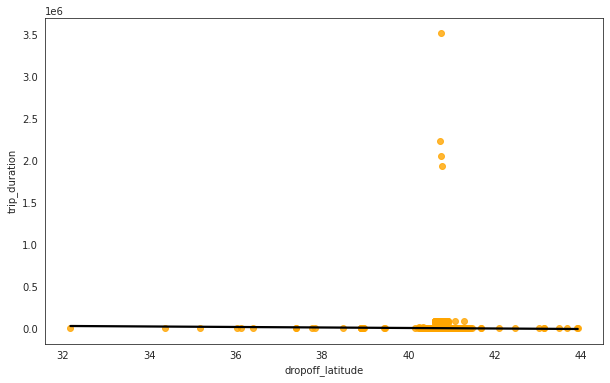

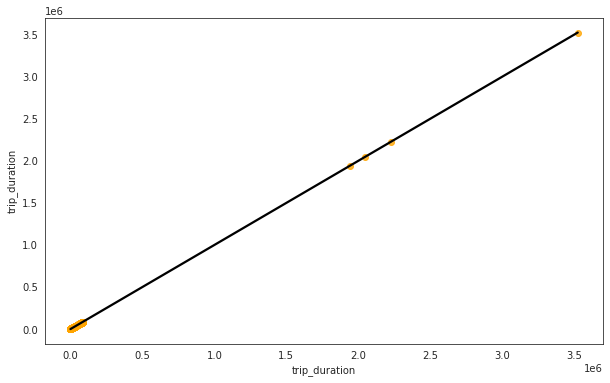

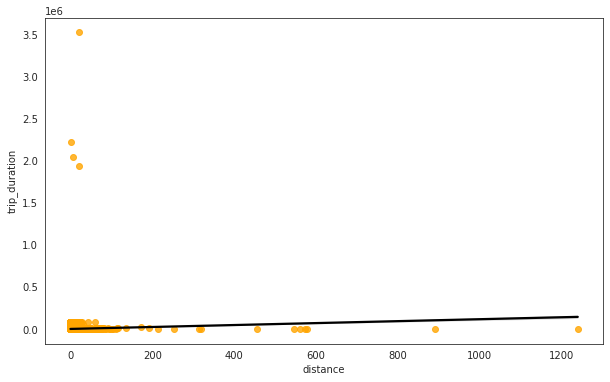

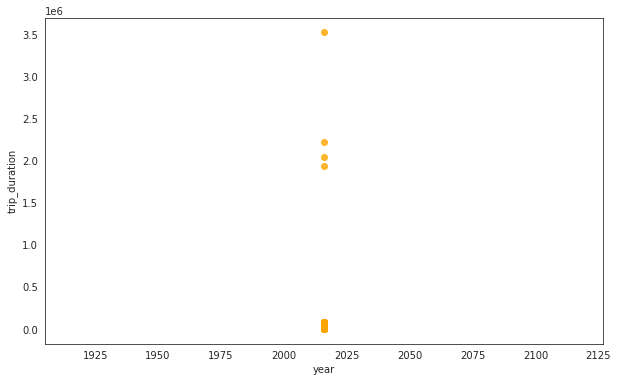

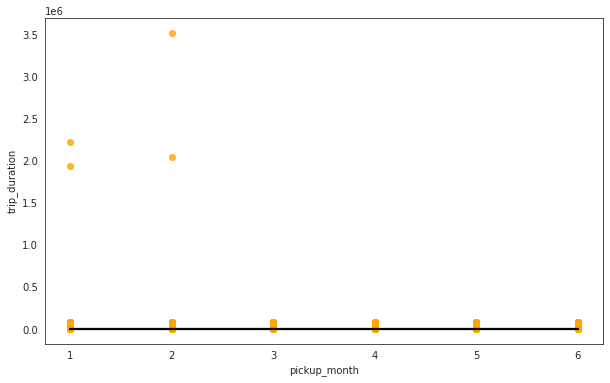

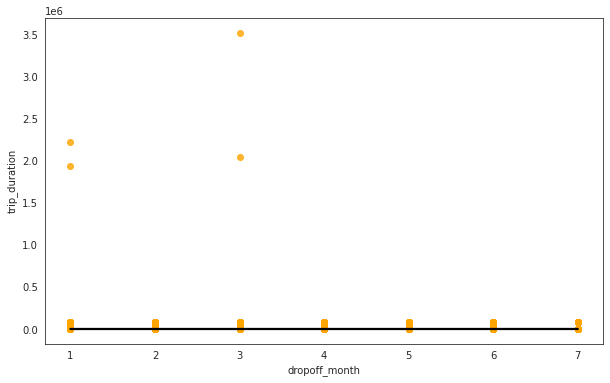

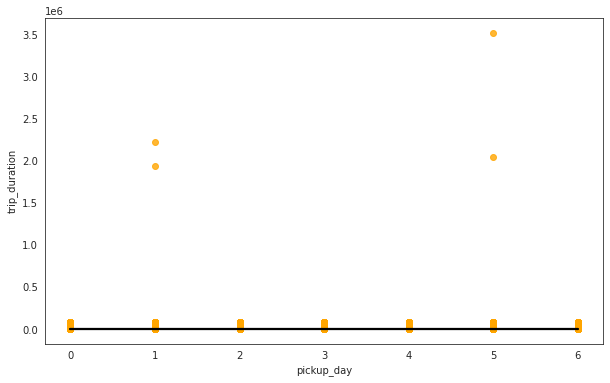

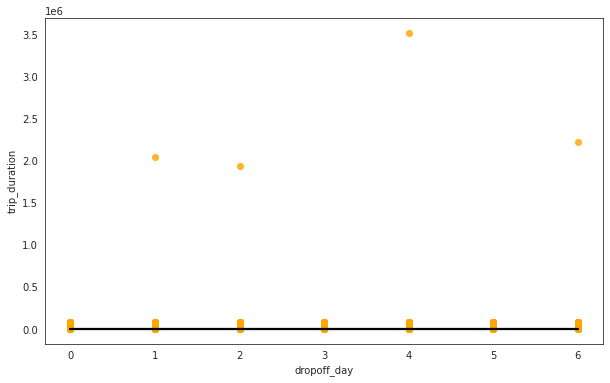

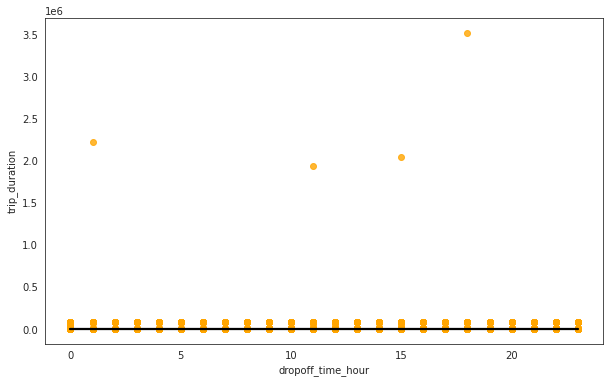

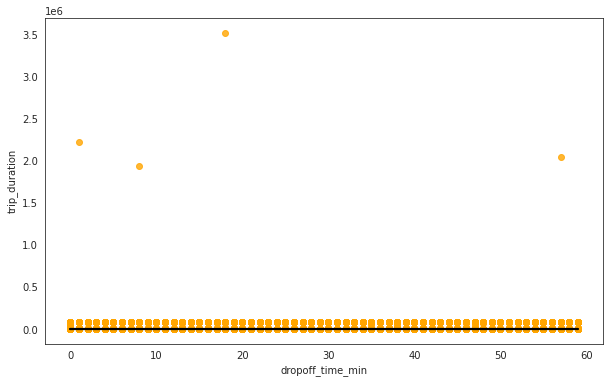

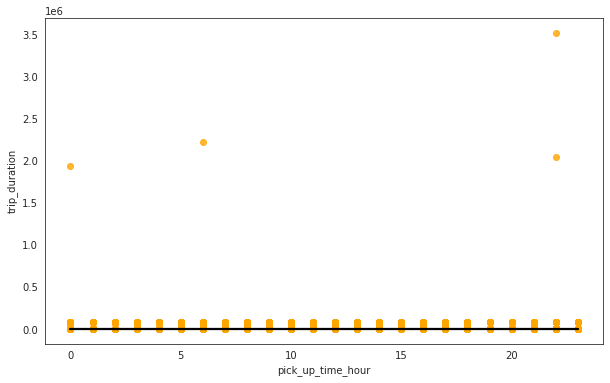

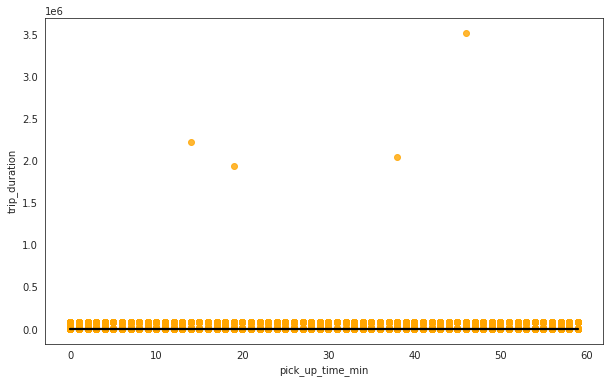

In [ ]:
for col in col:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=df[col],y=df['trip_duration'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})




##### 1. Why did you pick the specific chart?

Regression plots  creates a regression line between two parameters and helps to visualize their linear relationships.I have used regression plots to visualize the realationship between the dependent variable 'trip_duration' and other independent variables.

##### 2. What is/are the insight(s) found from the chart?

From the above plots we can see the relatioship between the dependent variable 'trip_duration' and other independent variables.From the plots we can figure out that there is no much linear relation between the dependent variable and other independent variables.We can only see a slight linear relation between 'trip_duration' and 'distance'.For rest of all the independent variables there is no linear relation with target variable.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Regression plot is to only visualize the relation between the two variables in the dataset.It doesnt have any to the business.
